# Ensembles

### Import libraries and Read data

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [182]:
data=pd.read_csv("flight-data.csv")
data.head()

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,...,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,...,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0


### Exploratory Data Analysis

In [183]:
data.shape

(10000, 25)

In [184]:
data.isna().sum()

carrier            0
flight             0
tailnum           74
origin             0
dest               0
air_time         284
distance           0
hour               0
minute             0
temp              48
dewp              48
humid             48
wind_dir         269
wind_speed        49
wind_gust       7613
precip            46
pressure        1192
visib             46
type            1501
manufacturer    1501
model           1501
engines         1501
seats           1501
engine          1501
arr_delay        284
dtype: int64

In [185]:
data.dtypes

carrier          object
flight            int64
tailnum          object
origin           object
dest             object
air_time        float64
distance          int64
hour              int64
minute            int64
temp            float64
dewp            float64
humid           float64
wind_dir        float64
wind_speed      float64
wind_gust       float64
precip          float64
pressure        float64
visib           float64
type             object
manufacturer     object
model            object
engines         float64
seats           float64
engine           object
arr_delay       float64
dtype: object

In [186]:
data.nunique()

carrier           16
flight          2290
tailnum         2795
origin             3
dest             101
air_time         381
distance         199
hour              19
minute            60
temp             142
dewp             127
humid           2005
wind_dir          37
wind_speed        32
wind_gust         34
precip            45
pressure         425
visib             19
type               3
manufacturer      28
model             86
engines            3
seats             40
engine             6
arr_delay          2
dtype: int64

* Dropped columns with categorical values which have more 10 unique values

In [187]:
data.drop(columns = ['carrier' , 'tailnum' , 'dest' , 'manufacturer' , 'model'] , inplace = True)

In [188]:
data.shape

(10000, 20)

In [189]:
data.dtypes

flight          int64
origin         object
air_time      float64
distance        int64
hour            int64
minute          int64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
type           object
engines       float64
seats         float64
engine         object
arr_delay     float64
dtype: object

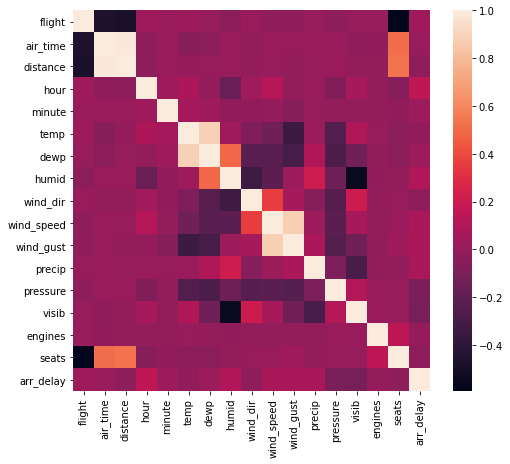

In [190]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(data.corr())
plt.show()

In [191]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
flight,10000.0,1993.785200,1637.565161,1.00000,580.75000,1511.00000,3514.25000,6181.00000
air_time,9716.0,149.771099,92.714630,21.00000,81.00000,130.00000,191.00000,648.00000
distance,10000.0,1033.036700,722.747763,80.00000,502.00000,872.00000,1389.00000,4983.00000
hour,10000.0,13.185300,4.691094,5.00000,9.00000,13.00000,17.00000,23.00000
minute,10000.0,26.405800,19.286677,0.00000,9.00000,29.00000,45.00000,59.00000
temp,9952.0,56.885289,17.967138,10.94000,42.08000,57.02000,71.96000,100.04000
dewp,9952.0,41.578652,19.360524,-9.04000,26.06000,42.80000,57.92000,78.08000
humid,9952.0,59.699401,19.713338,12.74000,43.92000,57.99000,75.69000,100.00000
wind_dir,9731.0,199.824273,106.234823,0.00000,120.00000,220.00000,290.00000,360.00000
wind_speed,9951.0,11.082228,5.635370,0.00000,6.90468,10.35702,14.96014,42.57886


### Filled Missing Values in Label and defined X and Y

In [192]:
data['arr_delay'] = data['arr_delay'].fillna(0)

In [193]:
numbers=['air_time', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
        'precip', 'pressure', 'visib' , 'wind_gust' ]
categories=['engine','origin', 'type']

In [194]:
X=data.drop(["arr_delay"],axis=1)
y=data["arr_delay"]

### Split X and y into train and test

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')

Training examples: 6000
Test examples: 4000


In [196]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Created pipeline for imputation of numerical and categorical values

In [197]:
from sklearn.pipeline import Pipeline
numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan ,strategy='mean')),
                           ('standardize_num', StandardScaler())])

categorical_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(missing_values = np.nan , strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore',  sparse=False))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numerical_pipeline, numbers),
                                                      ('create_dummies', categorical_pipeline, categories)])

### Pipeline for processing and three models - logistic regression , Decision Tree and Support vector classifier.

In [198]:
p1 = Pipeline([('processing', processing_pipeline),
               ('logreg', LogisticRegression())])

p2 = Pipeline([('processing', processing_pipeline),
               ('tree', DecisionTreeClassifier())])

p3 = Pipeline([('processing', processing_pipeline),
               ('svc', SVC())])

labs = ['Logistic Regression', 'Decision Tree', 'SVM']
clfs = [p1, p2, p3]
clfs = zip(labs, clfs)

### use voting classifier and measure ROC AUC for all models

In [199]:
from sklearn.ensemble import VotingClassifier

ems = [('lr', p1),('dc', p2),('svc', p3)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

ROC AUC 0.58 (+/- 0.02) [Logistic Regression]
ROC AUC 0.55 (+/- 0.02) [Decision Tree]
ROC AUC 0.59 (+/- 0.02) [SVM]


### Decision tree performance on train and train data

In [200]:
from sklearn.metrics import accuracy_score

tree = p2.fit(X_train, y_train)
tree_train_predict = tree.predict(X_train)
tree_test_predict = tree.predict(X_test)

tree_train_score = accuracy_score(y_train, tree_train_predict)
tree_test_score = accuracy_score(y_test, tree_test_predict)

print(f'Tree Training Score: {tree_train_score:.2%}')
print(f'Tree Test Score: {tree_test_score:.2%}')

Tree Training Score: 99.98%
Tree Test Score: 57.55%


### AdaBoost  performance on train and train data

In [201]:
from sklearn.ensemble import AdaBoostClassifier

p4 = Pipeline([('processing', processing_pipeline),
        ( 'AdaBoost',AdaBoostClassifier())])

ada = p4.fit(X_train, y_train)
ada_train_predict = ada.predict(X_train)
ada_test_predict = ada.predict(X_test)

ada_train_score = accuracy_score(y_train, ada_train_predict)
ada_test_score = accuracy_score(y_test, ada_test_predict)

print(f'AdaBoost Training Score: {ada_train_score:.2%}')
print(f'AdaBoost Test Score: {ada_test_score:.2%}')

AdaBoost Training Score: 64.57%
AdaBoost Test Score: 64.18%


### Note : Ada boost have proper model whereas tree has overffited.